In [1]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('IRIS.csv')

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
data.shape

(150, 5)

In [19]:
null_values = data.isnull().sum()
print(null_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [103]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3


In [105]:
# Drop duplicates
data = data.drop_duplicates()

In [111]:
data.shape

(147, 5)

In [113]:
print(data.groupby(['species']).count())

         sepal_length  sepal_width  petal_length  petal_width
species                                                      
0                  48           48            48           48
1                  50           50            50           50
2                  49           49            49           49


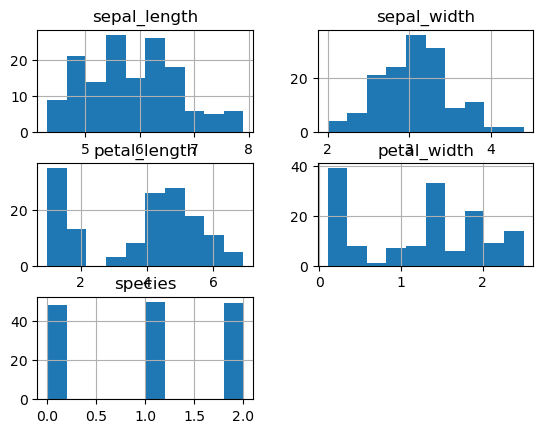

In [115]:
data.hist()
plt.show()

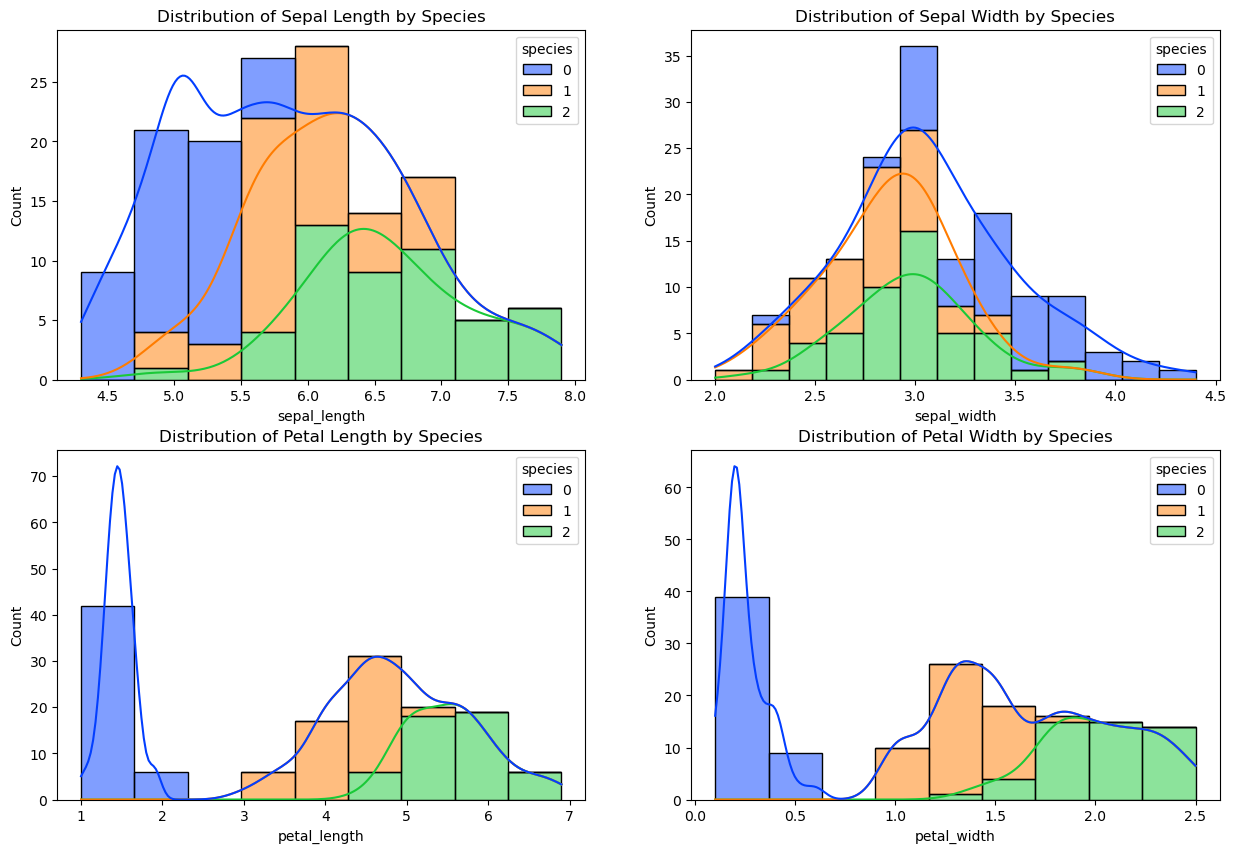

In [117]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(15, 10))

# Loop through the features and create a plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data, x=feature, hue='species', kde=True, palette='bright', multiple='stack')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Species')

plt.show()

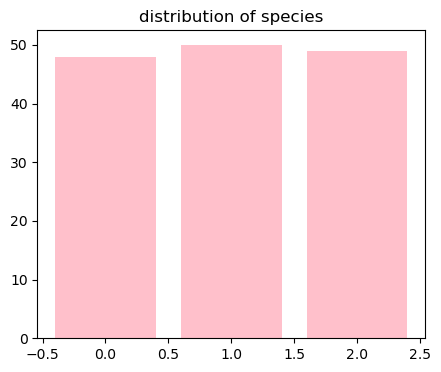

In [118]:
species = data['species'].value_counts()

plt.figure(figsize = (5,4))
plt.bar(species.index, species.values, color = 'pink')
plt.title('distribution of species')
plt.show()

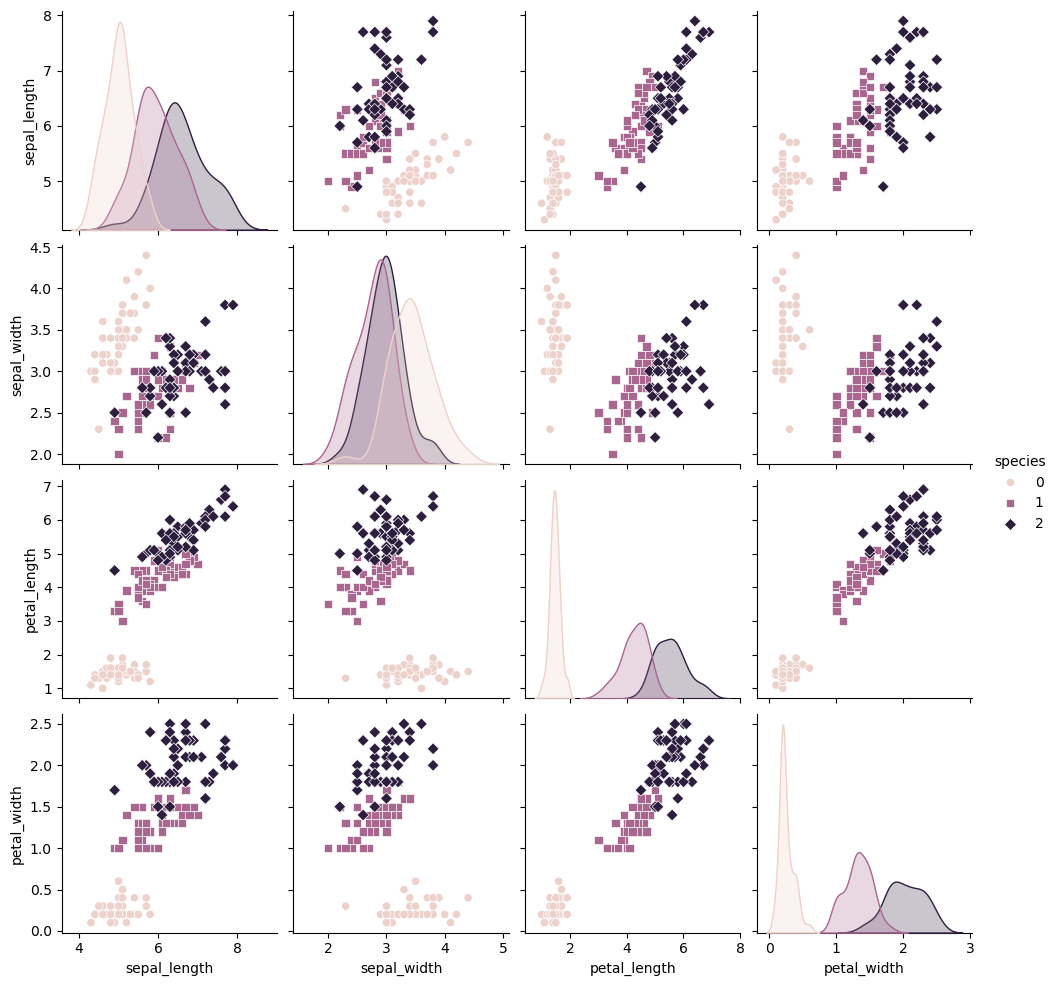

In [121]:
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.show()

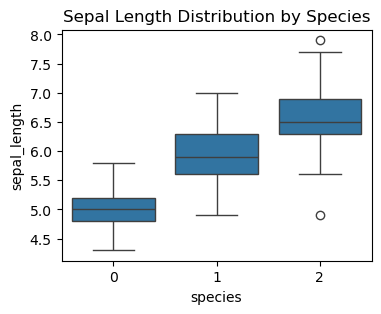

In [122]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Sepal Length Distribution by Species')
plt.show()

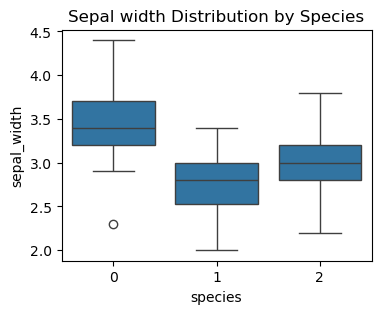

In [125]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='species', y='sepal_width', data=data)
plt.title('Sepal width Distribution by Species')
plt.show()

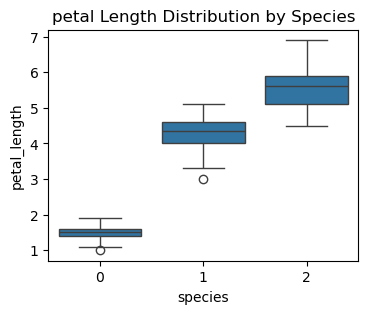

In [127]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='species', y='petal_length', data=data)
plt.title('petal Length Distribution by Species')
plt.show()

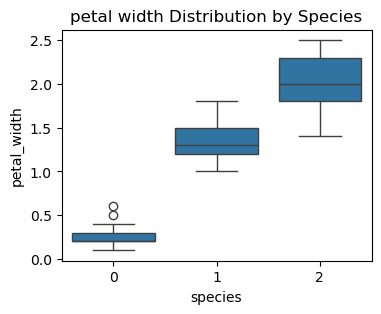

In [129]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='species', y='petal_width', data=data)
plt.title('petal width Distribution by Species')
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

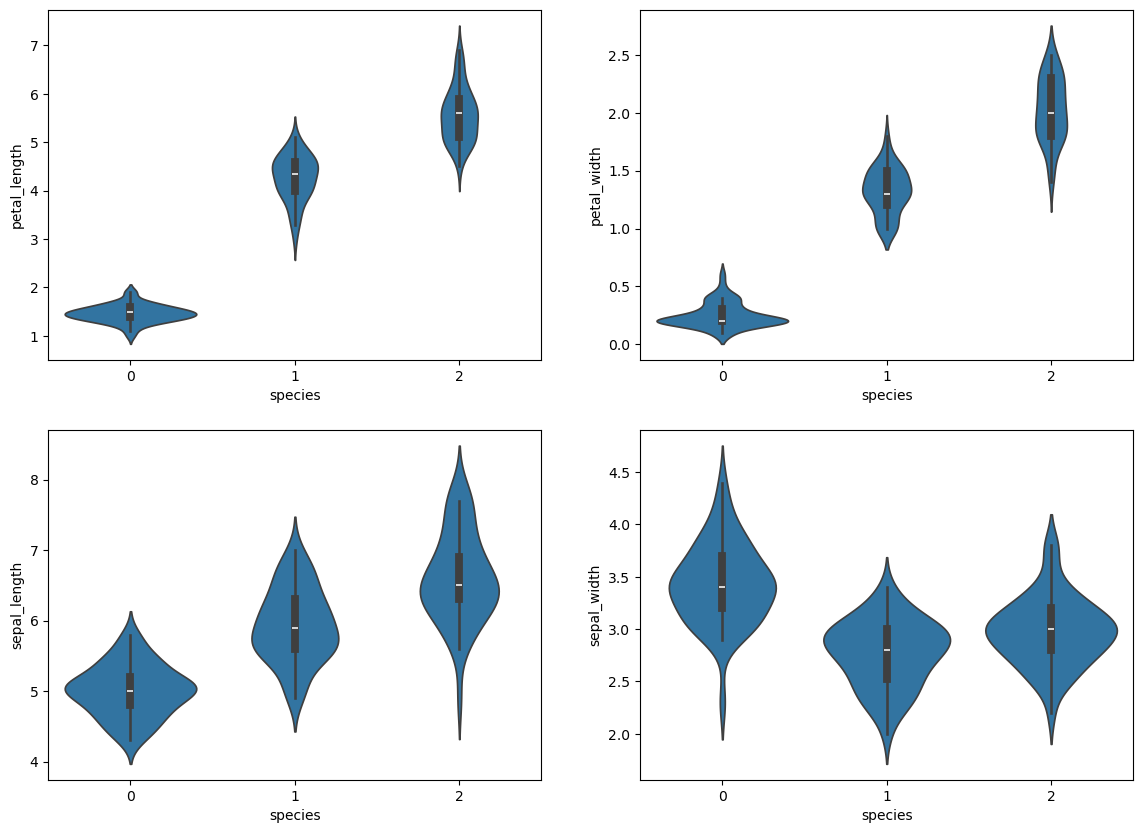

In [131]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y= 'sepal_width',data=data)

In [133]:
corr_matrix = data.drop(columns=['species']).corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


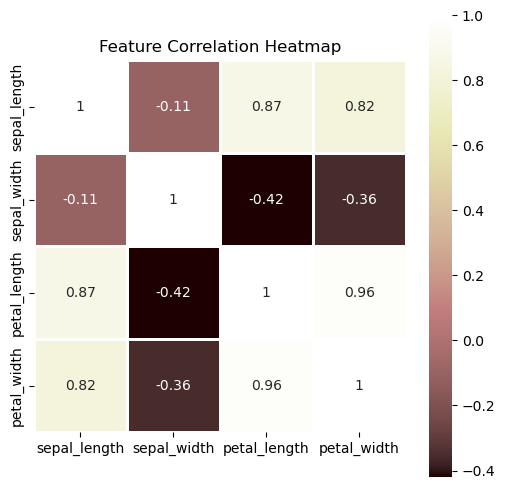

In [135]:
# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='pink', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [137]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['species'] = le.fit_transform(data['species'])

In [139]:
X = data.drop('species', axis=1)
y = data['species']

In [141]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [181]:
# Checking the Balance in data
y.value_counts(normalize=True) * 100 

species
1    34.013605
2    33.333333
0    32.653061
Name: proportion, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## **LogisticRegression**

In [150]:
lr = LogisticRegression(C = 100, max_iter=1000)
lr.fit(X_train , y_train)
lr_score = lr.score(X_test , y_test)
print(lr_score * 100)

97.77777777777777


# **DecisionTreeClassifier**

In [153]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)
dtc_score = dtc.score(X_test , y_test)
print(dtc_score * 100)

97.77777777777777


# **RandomForestClassifier**

In [156]:
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
rfc_score = rfc.score(X_test , y_test)
print(rfc_score * 100)

95.55555555555556


## **GaussianNB**

In [159]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
gnb_score = gnb.score(X_test , y_test)
print(gnb_score * 100)

97.77777777777777


## **KNeighborsClassifier**

In [162]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score * 100)

95.55555555555556


## **SVC**

In [165]:
svc = SVC()
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print(svc_score * 100)

95.55555555555556


In [167]:
# Make predictions

model_evaluation = {}
models = [lr,dtc,rfc, gnb, knn, svc]
model_results = {}

# Make Predictions
for model in models:
    model_results[str(model).split("(")[0]] = [model.predict(X_test)]
    
print(model_results)

{'LogisticRegression': [array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int64)], 'DecisionTreeClassifier': [array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int64)], 'RandomForestClassifier': [array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int64)], 'GaussianNB': [array([2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int64)], 'KNeighborsClassifier': [array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int64)], 'SVC': [array([2, 1, 2

In [179]:
# Import metrics for evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [171]:
for model, preds in model_results.items():
    model_evaluation[model] = [
                            round(accuracy_score(y_test, pd.DataFrame(preds).T) * 100, 2),
                            round(f1_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
                            round(precision_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
                            round(recall_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
    ]

In [173]:
print(model_evaluation)

{'LogisticRegression': [97.78, 97.54, 98.04, 97.22], 'DecisionTreeClassifier': [97.78, 97.54, 98.04, 97.22], 'RandomForestClassifier': [95.56, 95.14, 95.14, 95.14], 'GaussianNB': [97.78, 97.59, 97.44, 97.92], 'KNeighborsClassifier': [95.56, 95.14, 95.14, 95.14], 'SVC': [95.56, 95.14, 95.14, 95.14]}


In [175]:
results_df = pd.DataFrame(model_evaluation, index=["Accuracy", "F-1 Score", "Precision Score", "Recall Score"])
results_df.style.background_gradient(axis=None, cmap='pink')

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GaussianNB,KNeighborsClassifier,SVC
Accuracy,97.780000,97.780000,95.560000,97.780000,95.560000,95.560000
F-1 Score,97.540000,97.540000,95.140000,97.590000,95.140000,95.140000
Precision Score,98.040000,98.040000,95.140000,97.440000,95.140000,95.140000
Recall Score,97.220000,97.220000,95.140000,97.920000,95.140000,95.140000
